# Отчёт о проделанной работе

## Введение

**Задача:** Прогнозирование продаж товаров классическими методами прогнозирования временных рядов

## Что сделано:

1. Реализован класс, позволяющий:
    - Предобработать данные в удобный вид
    - Собрать фичи
    - Провести анализ данных для подбора гиперпараметров
    - Обучить и получить предсказания от следующих моделей:
        - Fourier
        - SARIMA
        - Exponential Smoothing
        - Unobserved Components
    - Оценить с помощью таблиц и графиков качество прогноза, в том числе:
        - Метрики ошибки прогнозирования
        - Качество остатков (стационарность, автокорреляции и др.)

2. Написан отчёт в формате Jupiter-ноутбука представляющий:
    - Общие сведения о проделанной работе
    - Описание методов модулей класса-решения
    - Демонстрация работы класса, включающая:
        - Препроцессинг
        - Анализ и преобразование данных
        - Обучение на 3 периода (7д, 30д, 90д) моделей, в том числе:
            - SARIMA
            - Exponential Smoothing
            - Unobserved Components
        - Сводные таблицы скоринга и визульная демонстрация предсказаний моделей

## Ответы на вопросы:

1. Какие методы предобработки данных вы использовали? Почему пробовали именно их?
  - Отчистка от нулей. Многие серии данных содержат «неестественные нули» — вероятно, место этих нулей должны были бы быть Nan, поэтому заменим их на значение последнего ненулевого.
  - Преобразование Йео-Джонсона. Разброс данных довольно сильный, преобразование Йео-Джонсона помогает стабилизировать дисперсию и при этом не требует исключения всех нулей. Пробовал альтернативный вариант — преобразование Бокса-Кокса — с ним модели показали метрики хуже.
  - Дифференцирование — в отчёте будет показано, что данные дифференцированно стационарные, к тому же SARIMA куда лучше предсказывает на долгий срок, поэтому изучение дифференцированных данных важно.
2. Какие модели пробовали? Почему пробовали именно их?
  - Fourier
  - SARIMA
  - Exponential Smoothing
  - Unobserved Components
Это почти все модели, которые у нас были, хотелось сравнить их между собой и внутри класса моделей. В целом после препроцессинга данные хорошо подходят и для SARIMA, но если бы данные были бы хуже, стоило бы рассмотреть в первую очередь Exponential Smoothing и Unobserved Components, т. к. они накладывают меньше ограничений на данные для обучения и предсказания.
3. Как вы проверяете качество модели? На каких данных? Какие метрики используете? Чем обусловлен выбор именно этих метрик?
  - Дата сет был разбит на train и test с самого начала во избежание лаков, так же т.к. для прогноза на каждый из периодов используется одни и те же модели, в test отрезан сразу на максимальный из периодов.
  - Для оценки используется MAES, т. к. много нулевых данных и значения MAPE часто будут неопределяться, даже WAPE иногда Nan на первых товарах.
  - Качество модели оценивается как совокупность качества остатков (стационарность, гомоскедатичность, нормальность и тп) и метрик (mean, median, 95per и тп). Эти данные можно посмотреть в ./results/ или вывести из модели в конце отчёта.
4. Какой подход из испробованных самый оптимальный с точки зрения качества прогнозирования? Какое итоговое качество модели на тестовом датасете?
Для каждого товара и периода лидер свой, но если считать число раз, когда модель была лучшей внутри одного периода, то побеждает SARIMAX, набирающий более половины (>=8) побед в каждом периоде.

*P.S. Часть моделей поддерживают exog-фичи, но сил оформить решение с ними не хватило, хотя все фичи собираются. Вероятно, с ними результаты могли бы быть лучше.*

## О решении

### Описание модулей 

#### solution

Сам solution, по сути, просто хранит данные и агрегирует функции модулей, применяя их сразу на весь датасет.

#### solution.preprocessor

feature_engineering -
- Формирует датасет из данных по продажам, календаря и стоимостям товаров.
- Добавляет категориальные фичи праздников.
- Добавляет ценовую фичу.
- Добавляет фичи abs_day, abs_week, abs_month для упрощения group_by

feature_engineering_store - feature_engineering по всему магазину

feature_engineering_report - формирует отчёт о работе feature_engineering

group_by - группирует по abs_day, abs_week, abs_month

#### solution.analyser

draw_period_dynamic - рисует график изменения значение по элементам периода

analyse_time_series - выводит параметры временного ряда:
- Выводит параметры временного ряда:
- Стационарность
- Гомоскедатичность
- Среднее= 0
- Нормальность

show_fourier_decomposition - рисует частотный график временного ряда

#### solution.transformer

complete_zeroes - заполняет нули в данных через первый ненулевой элемент до или первый ненулевой элемент после

yeojohnson - применяет преобразование Йео-Джонсона

yeojohnson_reverse - отменяет преобразование Йео-Джонсона

boxcox - применяет преобразование Бокса-Кокса

boxcox_reverse - отменяет преобразование Бокса-Кокса

diff - применяет дифференцирование

diff_reverse - отменяет дифференцирование

#### solution.visualiser

visualize_dataset - рисует графики изменения продаж, цены и изменения продаж с событиями

visualize_acf_pacf - рисует графики функций автокорреляций и частичных автокорреляций

visualize_result - рисует графики предиктов моделей и верных ответов на одном графике

#### solution.models

exponential_smoothing - позволяет обучать модель и делать предикты сразу для нескольких моделей класса Exponential Smoothing с разными параметрами.

fourier - позволяет составить предсказание на основе нескольких наиболее значащих по амплитуде частот в разложении Фурье

sarimax - позволяет составить предсказание на основе нескольких наиболее значащих по амплитуде частот в разложении Фурье.

unobsorved_components - позволяет обучать модель и делать предикты сразу для нескольких моделей класса Unobsorved Сomponents с разными параметрами, в том числе с использованием exogs параметров.

## Демонстрация работы класса

### Импорты

In [1]:
import warnings
import pandas as pd
from solution.solution import Solution
warnings.filterwarnings("ignore")

### Глобальные переменные

In [2]:
CALENDAR = pd.read_csv('../source/shop_sales_dates.csv')
DATA = pd.read_csv('../source/shop_sales.csv')
PRICES = pd.read_csv('../source/shop_sales_prices.csv')
STORES = sorted(DATA['store_id'].unique())

PERIODS = {"week": 7, "month": 30, "quarter": 90}

ROW = 5
COLUMN = 3

SOLUTION = Solution(ROW, COLUMN, PERIODS)


### Препроцессинг (собираем фичи)

In [3]:
STORE = STORES[0]
SOLUTION.load(STORE, DATA, CALENDAR, PRICES)
SOLUTION.group_by("abs_day")

In [4]:
SOLUTION.working[SOLUTION.items[0]].head()

item_id store_id  cnt  CASHBACK_STORE_1  CASHBACK_STORE_2  \
abs_day                                                                  
0        STORE_1_064  STORE_1    0                 0                 0   
1        STORE_1_064  STORE_1    1                 0                 0   
2        STORE_1_064  STORE_1    0                 0                 0   
3        STORE_1_064  STORE_1    0                 0                 1   
4        STORE_1_064  STORE_1    0                 1                 1   

         CASHBACK_STORE_3  sell_price  EVENT_Halloween  EVENT_ValentinesDay  \
abs_day                                                                       
0                       0        2.54                0                    0   
1                       0        2.54                0                    0   
2                       0        2.54                0                    0   
3                       1        2.54                0                    0   
4                       0        2.54                0                    0   

         EVENT_LentWeek2  ...  EVENT_ColumbusDay  EVENT_Pesach End  \
abs_day                   ...                                        
0                      0  ...                  0                 0   
1                      0  ...                  0                 0   
2                      0  ...                  0                 0   
3                      0  ...                  0                 0   
4                      0  ...                  0                 0   

         EVENT_Chanukah End  EVENT_NBAFinalsStart  EVENT_EidAlAdha  \
abs_day                                                              
0                         0                     0                0   
1                         0                     0                0   
2                         0                     0                0   
3                         0                     0                0   
4                         0                     0                0   

         EVENT_PresidentsDay  EVENTTYPE_Cultural  EVENTTYPE_National  \
abs_day                                                                
0                          0                   0                   0   
1                          0                   0                   0   
2                          0                   0                   0   
3                          0                   0                   0   
4                          0                   0                   0   

         EVENTTYPE_Sporting  EVENTTYPE_Religious  
abs_day                                           
0                         0                    0  
1                         0                    0  
2                         0                    0  
3                         0                    0  
4                         0                    0  

[5 rows x 41 columns]

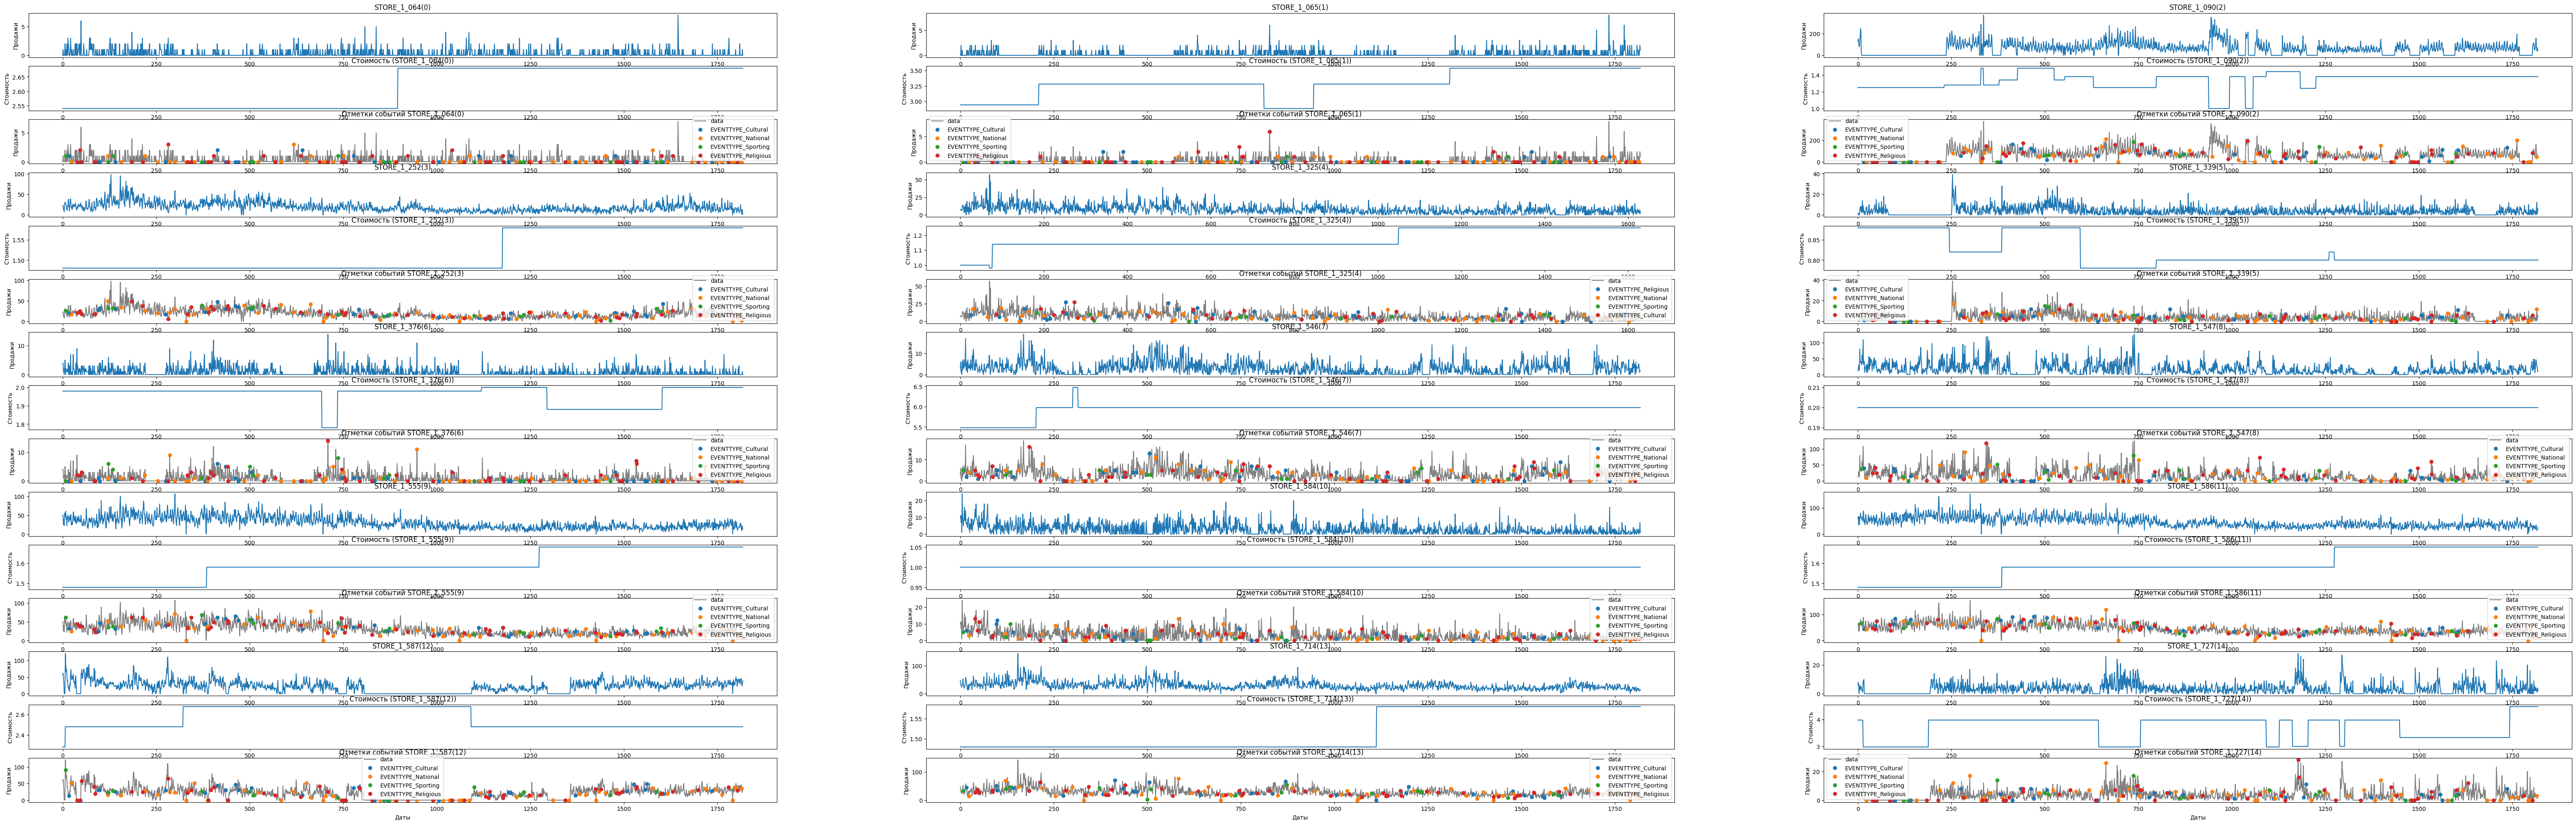

In [5]:
SOLUTION.visualize_dataset()

Разделим данные train/test для обучения на 3 сценария: 7 дней, 30 дней, 90 дней

In [6]:
SOLUTION.split_train_test()

### Анализ


#### Общий анализ
Оценим параметры train рядов:

In [7]:
SOLUTION.general_analyse()

Анализ (STORE_1_064(0))
                 title            method           val   check  result opinion
0        no_stationary          adfuller  1.788548e-21  <=0.05    True       ✅
1        is_stationary              kpss  1.000000e-02   >0.05   False       ❌
2   no_autocorrelation    acorr_ljungbox  1.000000e+01     ==0   False       ❌
3  is_homoscedasticity  het_breuschpagan  1.973733e-02   >0.05   False       ❌
4         is_mean_zero       ttest_1samp  5.305732e-85   >0.05   False       ❌
5         is_normality           shapiro  6.229985e-55   >0.05   False       ❌
6                total                 -           NaN       -   False       ❌
Анализ (STORE_1_065(1))
                 title            method           val   check  result opinion
0        no_stationary          adfuller  1.789872e-05  <=0.05    True       ✅
1        is_stationary              kpss  6.376277e-02   >0.05    True       ✅
2   no_autocorrelation    acorr_ljungbox  1.000000e+01     ==0   False       ❌
3  i

|Только последний ряд демонстрирует стационраность по обоим критериям. Все ряды гетероскедастичны.

#### Отчистка от нулей
По графикам рядов видно, что только для товаров под индексами 0, 1, 6, 7, 8 нули могут быть естественны, поэтому в остальных заменим нули предыдущим ненулевым значением. От всех нулей избавляться не будем, т. к. преобразование Йео-Джонсона этого не требует.

In [8]:
NATIVE_ZERO = {0, 1, 6, 7, 8}

SOLUTION.clean_zeros(NATIVE_ZERO)

STORE_1_090(2) zeroes: 451 -> 0
STORE_1_252(3) zeroes: 7 -> 0
STORE_1_325(4) zeroes: 125 -> 0
STORE_1_339(5) zeroes: 443 -> 0
STORE_1_555(9) zeroes: 5 -> 0
STORE_1_584(10) zeroes: 414 -> 0
STORE_1_586(11) zeroes: 5 -> 0
STORE_1_587(12) zeroes: 423 -> 0
STORE_1_714(13) zeroes: 6 -> 0
STORE_1_727(14) zeroes: 480 -> 0


#### Стабилизация дисперсии
Применим преобразование Йео-Джонсона для стабилизации дисперсии

In [9]:
SOLUTION.variance_stabilization()

### Стационарность
Почти у всех рядов adfuller проходит порог, а kpss - нет => ряды дифференцированно стационарные.
Продифференцируем с лагом 1 и с сезонным лагом 7 и посмотрим на результат.


In [10]:
LAG = 1
SOLUTION.do_diff(LAG)

Анализ (STORE_1_064(0))
                 title            method           val   check  result opinion
0        no_stationary          adfuller  1.878979e-27  <=0.05    True       ✅
1        is_stationary              kpss  1.000000e-01   >0.05    True       ✅
2   no_autocorrelation    acorr_ljungbox  1.000000e+01     ==0   False       ❌
3  is_homoscedasticity  het_breuschpagan  1.181547e-03   >0.05   False       ❌
4         is_mean_zero       ttest_1samp  1.000000e+00   >0.05    True       ✅
5         is_normality           shapiro  3.540680e-44   >0.05   False       ❌
6                total                 -           NaN       -   False       ❌
Анализ (STORE_1_065(1))
                 title            method           val   check  result opinion
0        no_stationary          adfuller  2.561418e-26  <=0.05    True       ✅
1        is_stationary              kpss  1.000000e-01   >0.05    True       ✅
2   no_autocorrelation    acorr_ljungbox  1.000000e+01     ==0   False       ❌
3  i

In [11]:
SEASONAL_LAG = 7
SOLUTION.do_diff_seasonal(SEASONAL_LAG)

Анализ (STORE_1_064(0))
                 title            method           val   check  result opinion
0        no_stationary          adfuller  1.348332e-29  <=0.05    True       ✅
1        is_stationary              kpss  1.000000e-01   >0.05    True       ✅
2   no_autocorrelation    acorr_ljungbox  4.000000e+00     ==0   False       ❌
3  is_homoscedasticity  het_breuschpagan  3.901000e-01   >0.05    True       ✅
4         is_mean_zero       ttest_1samp  9.349592e-01   >0.05    True       ✅
5         is_normality           shapiro  1.576110e-43   >0.05   False       ❌
6                total                 -           NaN       -   False       ❌
Анализ (STORE_1_065(1))
                 title            method           val   check  result opinion
0        no_stationary          adfuller  1.460125e-25  <=0.05    True       ✅
1        is_stationary              kpss  1.000000e-01   >0.05    True       ✅
2   no_autocorrelation    acorr_ljungbox  4.000000e+00     ==0   False       ❌
3  i

Все ряды в результате дифференцирования на 1lag, 7lag по 1 разу стали стационарными.

#### Автокорреляционные и частичные автокорреляционные функции

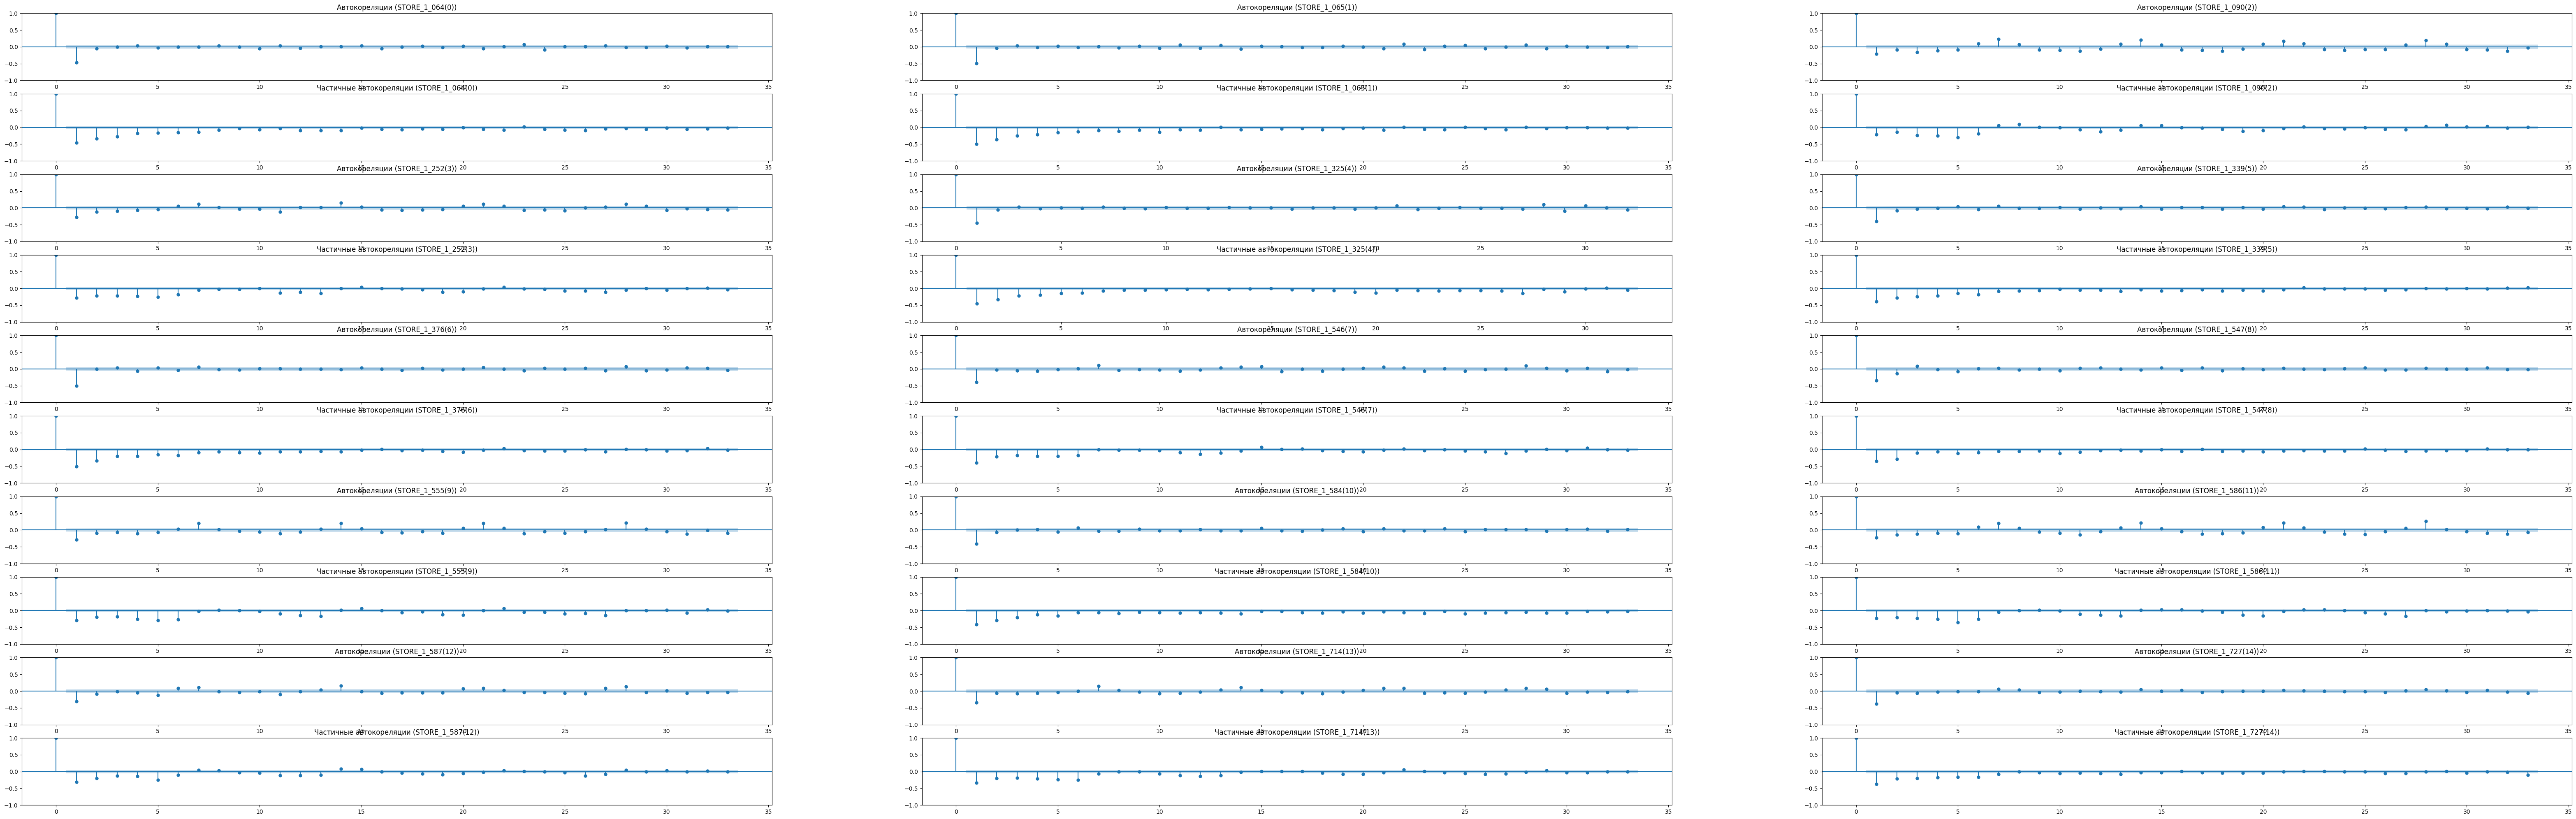

In [12]:
SOLUTION.visualize_acf_pacf(LAG)

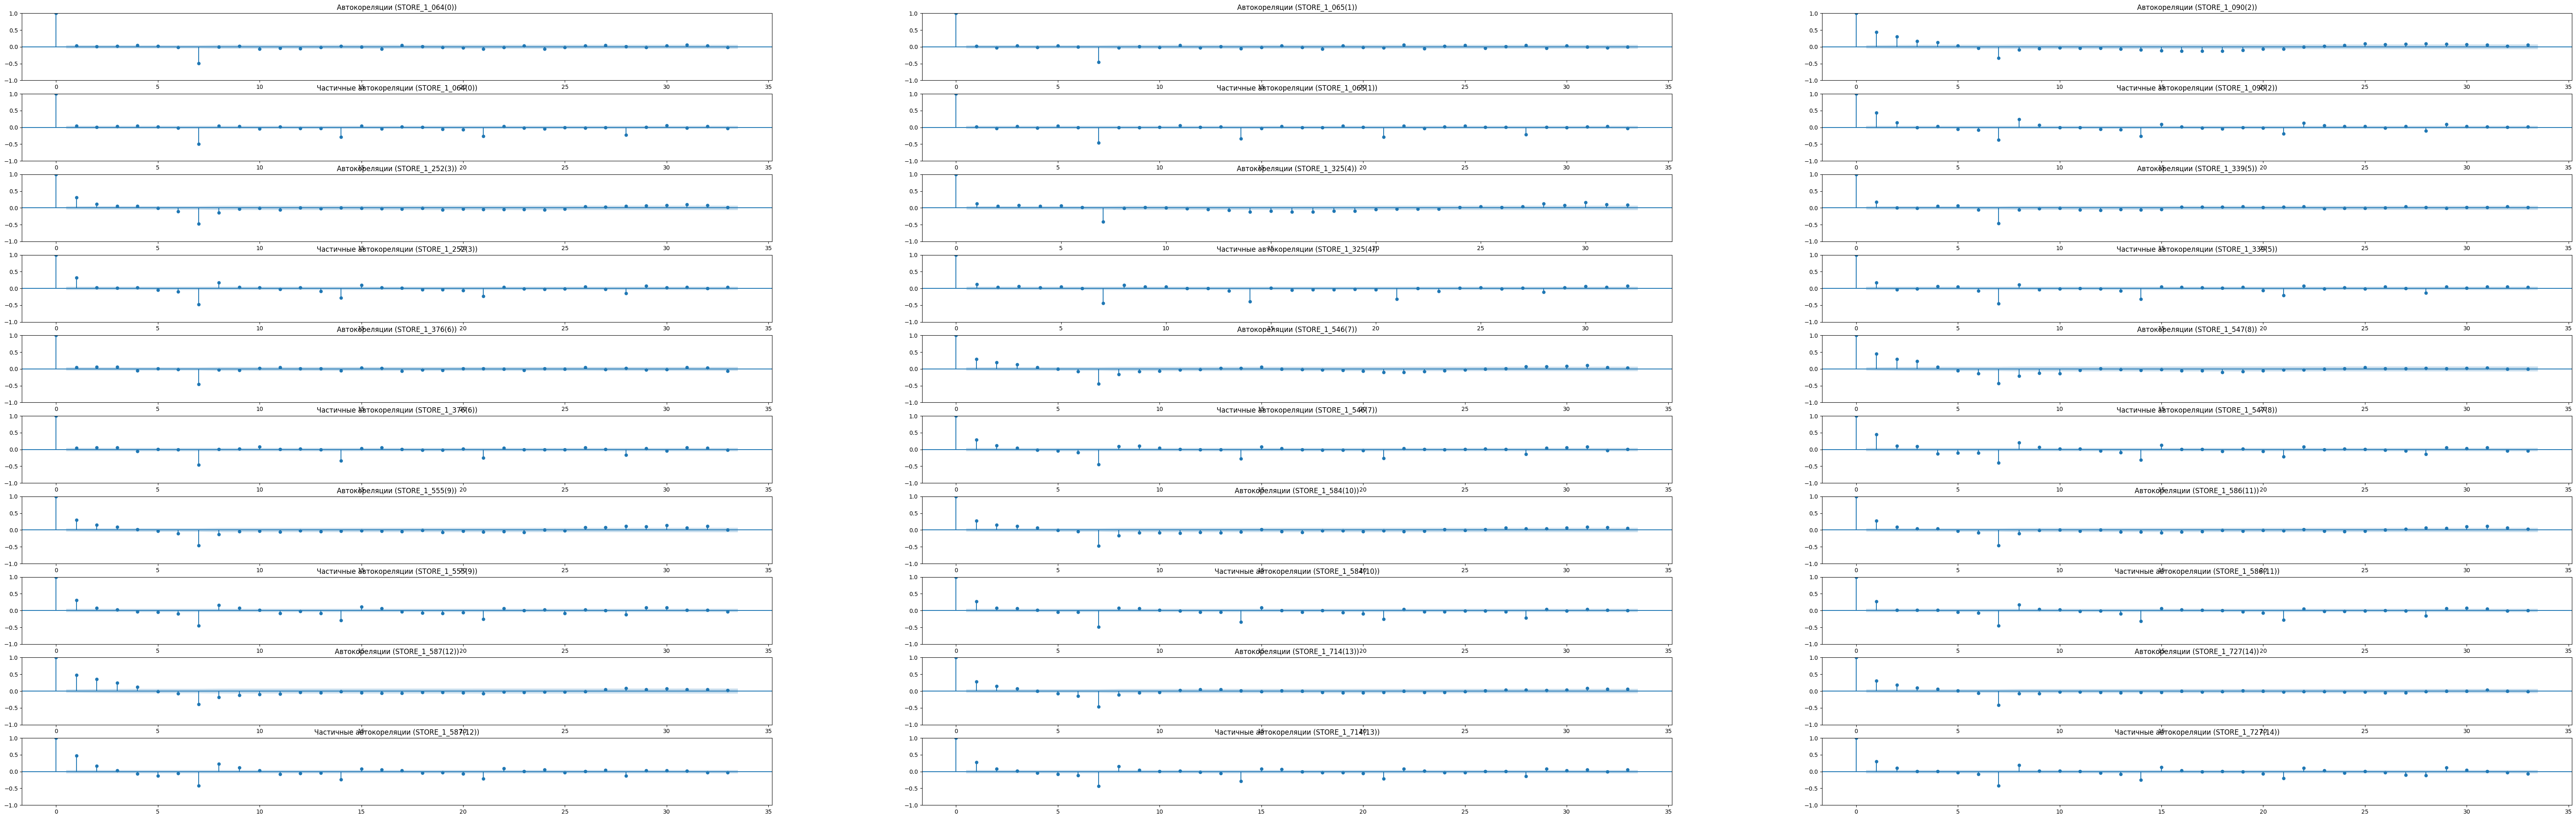

In [13]:
SOLUTION.visualize_acf_pacf(SEASONAL_LAG)

### Предсказания

#### Exponential Smoothing

In [14]:
EXPONENTIAL_SMOOTHING_SPACE = [
    {
        "name": "EXP_SMOOTH_esti",
        "trend": None,
        "seasonal": "add",
        "seasonal_periods": 7,
        "init": "estimated",
        "use_boxcox": False
    },
    {
        "name": "EXP_SMOOTH_heur",
        "trend": None,
        "seasonal": "add",
        "seasonal_periods": 7,
        "init": "heuristic",
        "use_boxcox": False
    },
]

#### Unobserved Components

In [15]:
UNOBSERVED_COMPONENTS_SPACE = [
    {
        "name": "UNOB_COMPS_deter",
        "level": 'deterministic constant',
        "trend": False,
        "seasonal": 7,
        "cycle": False,
        "irregular": True,
        "stochastic_level": False,
        "stochastic_trend": False,
        "damped_cycle": False,
    },
]

#### SARIMAX

In [16]:
SARIMAX_SPACE = {
    "p": [1, 6],
    "q": [1, 6],
    "P": [1, 6],
    "Q": [1, 6],
    "d": 1,
    "D": 1,
    "seasonal_period": 7
}

In [17]:
SOLUTION.fit(EXPONENTIAL_SMOOTHING_SPACE, UNOBSERVED_COMPONENTS_SPACE, SARIMAX_SPACE, None)

fitting exponential smoothing models ...
fitting unobserved components models ...
fitting sarimax models ...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-818.285, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-1788.262, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=2.25 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-1270.109, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-1920.997, Time=0.89 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=4.64 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=-1478.925, Time=0.50 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=-2129.461, Time=0.75 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=-1979.907, Time=0.48 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=4.23 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=2.02 sec
 ARIMA(3,1,0)(

In [18]:
SOLUTION.predict()

predicting exponential smoothing models ...
predicting unobserved components models ...
predicting sarimax models ...


### Отменяем внесённые изменения 

#### Отменяем дифференцирование

In [19]:
SOLUTION.predicts_reverse_diff()

#### Отменяем преобразование Йео-Джонсона

In [20]:
SOLUTION.predicts_reverse_yeojohnson()

### Скоринг

Результаты на week: 


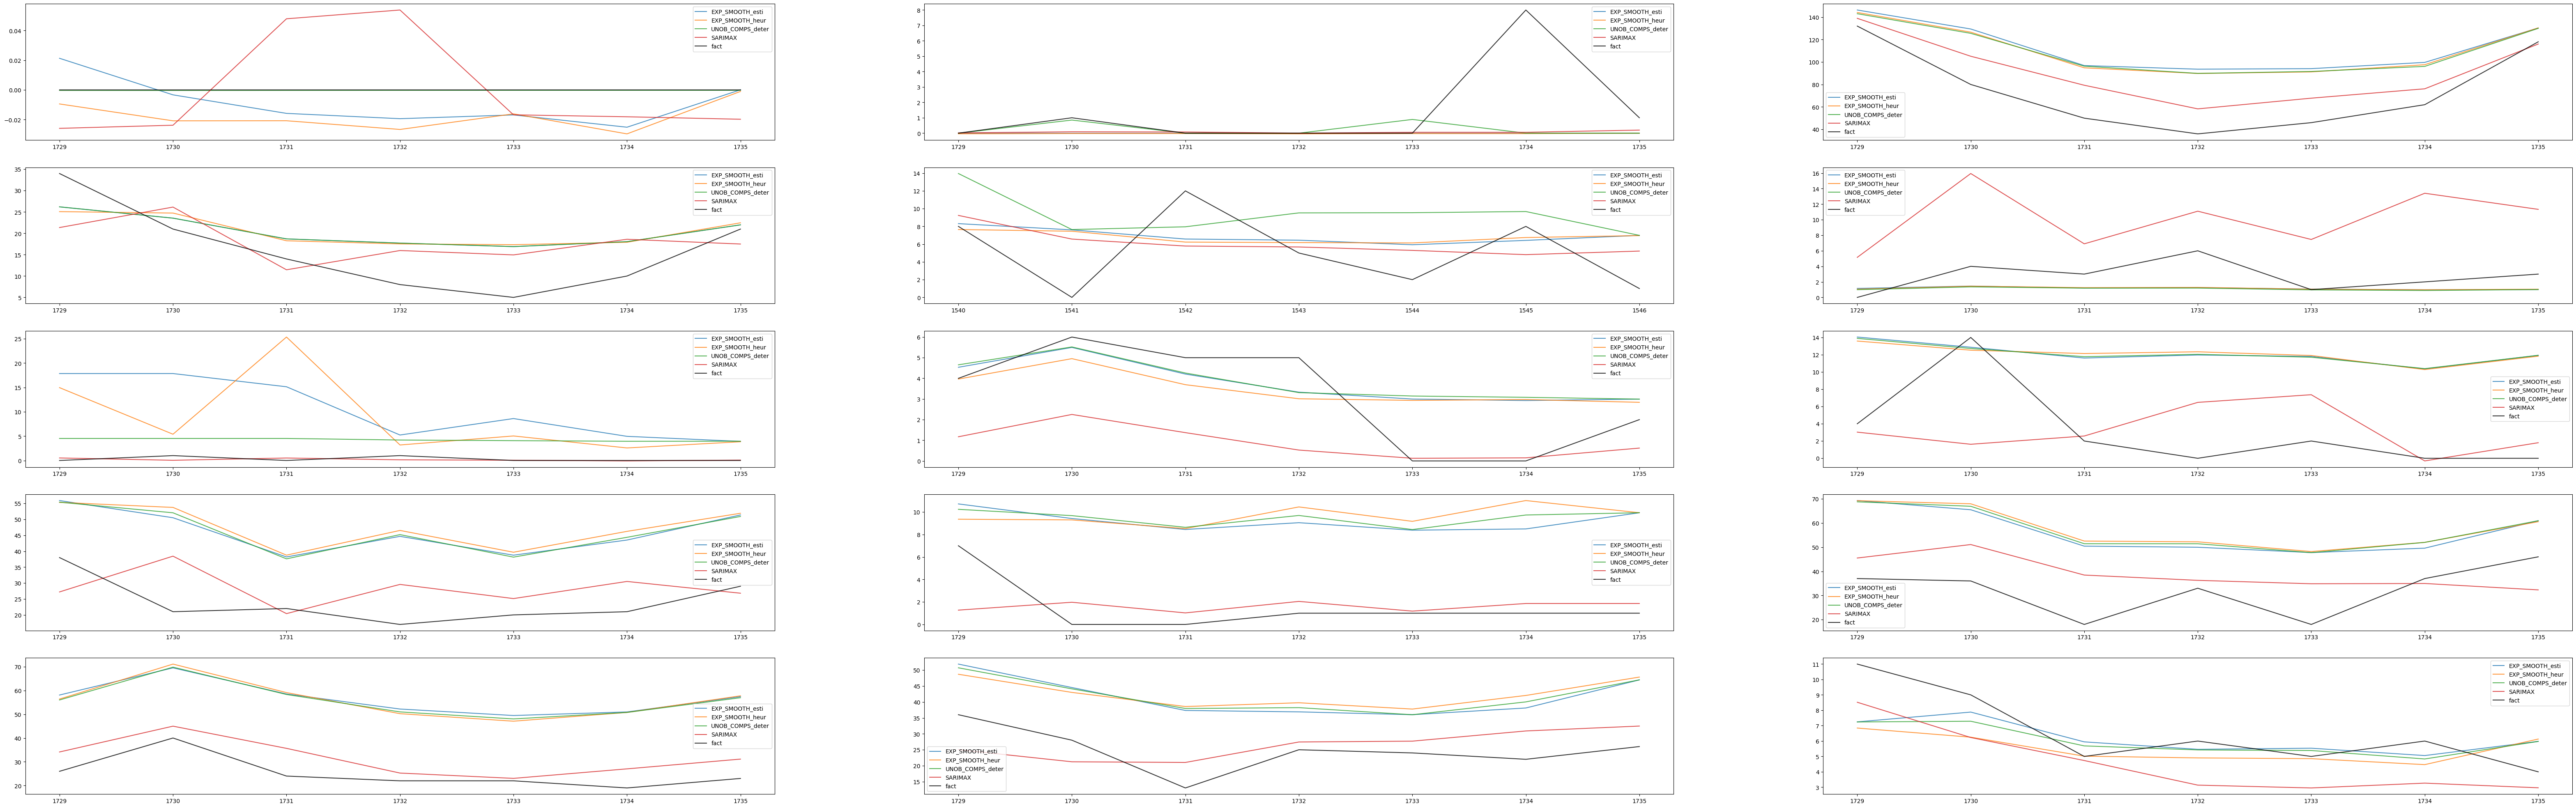

Результаты на month: 


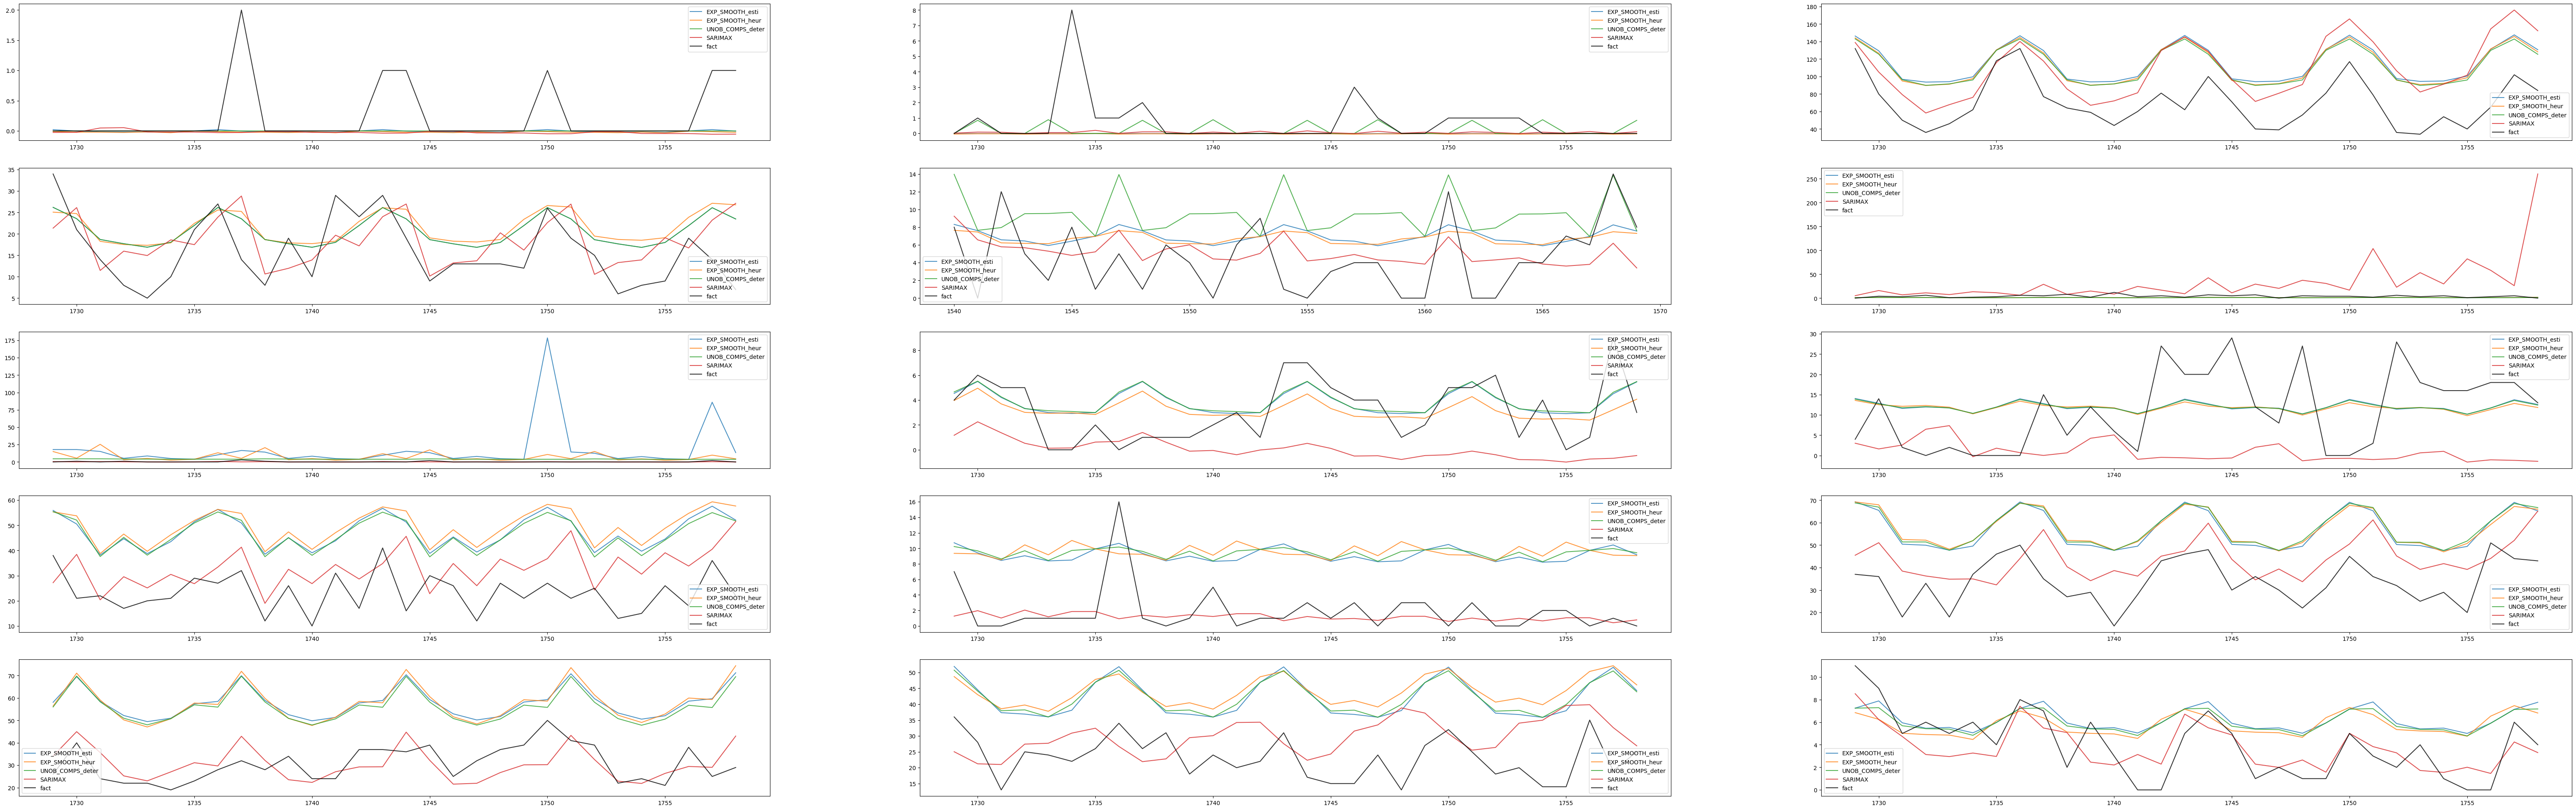

Результаты на quarter: 


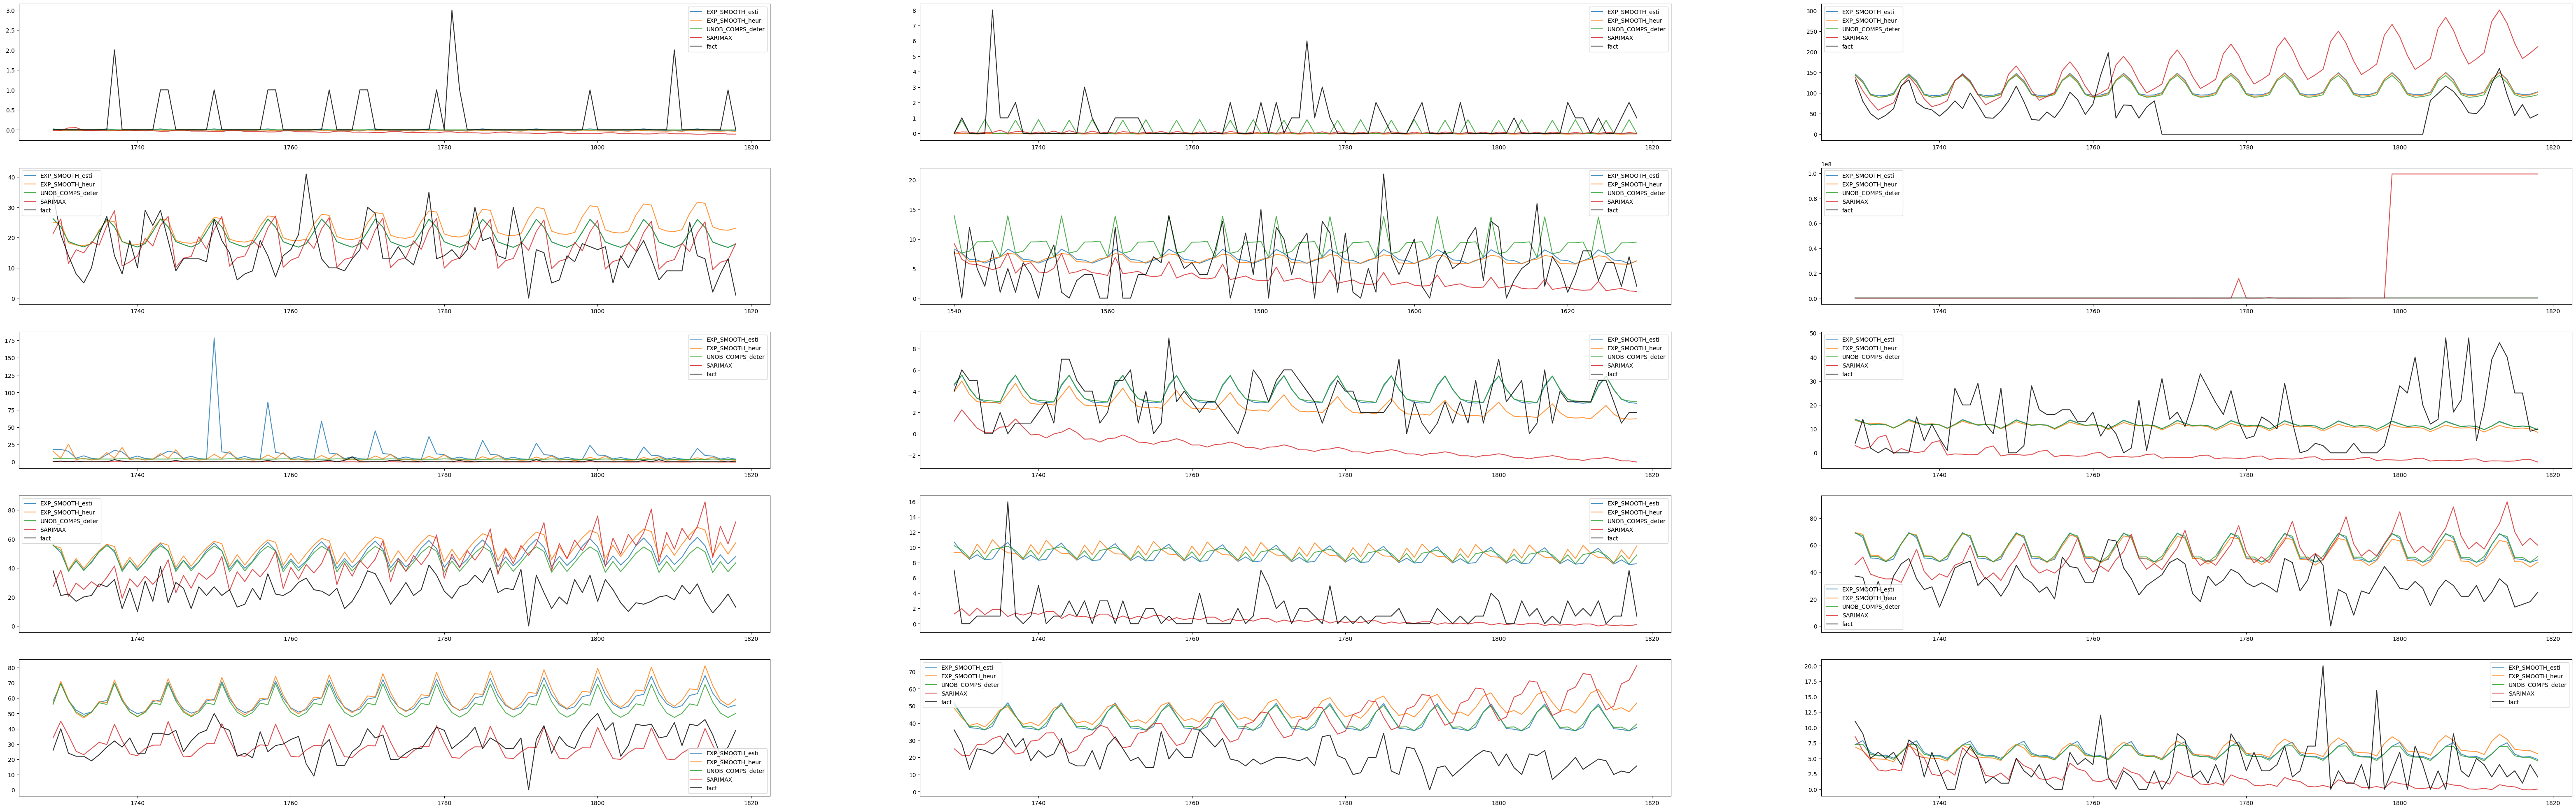

In [21]:
SOLUTION.scoring_predicts()

Выведем победителей:

In [22]:
SOLUTION.print_best()

Результаты по week:
STORE_1_064(0) best: UNOB_COMPS_deter (0.00027871554507918894)
STORE_1_065(1) best: EXP_SMOOTH_esti (0.01975358545448458)
STORE_1_090(2) best: SARIMAX (21.80280276592447)
STORE_1_252(3) best: EXP_SMOOTH_esti (7.802209632064709)
STORE_1_325(4) best: SARIMAX (3.2964383873177043)
STORE_1_339(5) best: EXP_SMOOTH_heur (1.74533134901991)
STORE_1_376(6) best: SARIMAX (0.5076452817091064)
STORE_1_546(7) best: EXP_SMOOTH_esti (0.9943642320812884)
STORE_1_547(8) best: SARIMAX (1.8041935957355784)
STORE_1_555(9) best: SARIMAX (9.50309750427516)
STORE_1_584(10) best: SARIMAX (1.0272767640733393)
STORE_1_586(11) best: SARIMAX (13.690601902391535)
STORE_1_587(12) best: SARIMAX (8.02860953849024)
STORE_1_714(13) best: SARIMAX (6.779408504562948)
STORE_1_727(14) best: EXP_SMOOTH_esti (0.9465579961667645)
Результаты по month:
STORE_1_064(0) best: UNOB_COMPS_deter (0.0008008040385000248)
STORE_1_065(1) best: EXP_SMOOTH_esti (0.008562945166720515)
STORE_1_090(2) best: SARIMAX (33.1682

Посмотреть полный скоринг по предметы и периоду:

In [23]:
SOLUTION.scoring_results[SOLUTION.items[0]]["week"]

mean    median    quan75    quan95       std  \
EXP_SMOOTH_esti   0.014552  0.016843  0.020340  0.023979  0.009337   
EXP_SMOOTH_heur   0.017775  0.020764  0.023724  0.028720  0.009913   
UNOB_COMPS_deter  0.000300  0.000279  0.000330  0.000358  0.000041   
SARIMAX           0.029431  0.023777  0.036900  0.052049  0.015074   

                            no_stationary         is_stationary  \
EXP_SMOOTH_esti    5.302230782309191e-05✅                  0.1✅   
EXP_SMOOTH_heur    0.0034101932761461894✅                  0.1✅   
UNOB_COMPS_deter  5.6638056451068736e-30✅  0.08715580318269615✅   
SARIMAX              0.11653121171247122❌                  0.1✅   

                 no_autocorrelation   is_homoscedasticity  \
EXP_SMOOTH_esti                0.0✅    0.950250567216144✅   
EXP_SMOOTH_heur                0.0✅   0.8140810436747566✅   
UNOB_COMPS_deter               1.0❌  0.01028070586797339❌   
SARIMAX                        0.0✅   0.6045342634083262✅   

                             is_mean_zero            is_normality  
EXP_SMOOTH_esti         0.20824085987201✅    0.30624980570882543✅  
EXP_SMOOTH_heur     0.003177629544877848❌     0.7438517037439398✅  
UNOB_COMPS_deter  1.2559209198026182e-06❌    0.09780226628285332✅  
SARIMAX               0.9790476428319346✅  0.0032181625480666182❌